In [1]:
# Import required libraries
import os
from fastai.vision import *
from fastai.metrics import error_rate

In [5]:
# If memory problems, reduce batch size to 32 or 16
batch_size = 64

In [6]:
# Dir containing images. It should have subfolders 'train' and 'valid'
# 'train' folder contains training images. 'valid' folder contains validation images
# It can optionally also contain 'test' folder containing test images
cwd = os.getcwd()
data_dir = '{0}/../data/check_sizes'.format(cwd)

In [7]:
# Path where trained model will be stored
trained_model_file = '{0}/../models/check_sizes.pkl'.format(cwd)

In [8]:
# Create data object from images folder. We will use resnet34 and it works
# better with 224 size images, so set size to 224
data = ImageDataBunch.from_folder(path=data_dir, size=224, bs=batch_size)

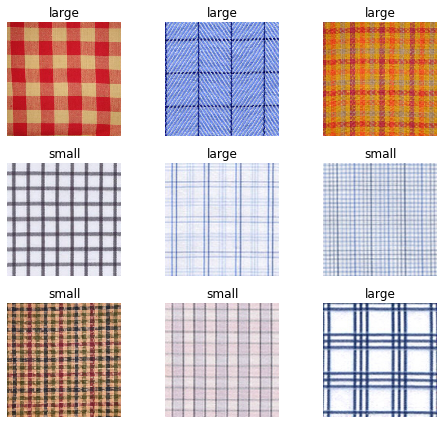

In [9]:
# Display a few images
data.show_batch(rows=3, figsize=(7,6))

In [10]:
# Create CNN learner using resnet34 model. Pass the metrics that we want
# to monitor. Here important metric is error_rate (proportions of instances
# misclassified over total instances). 
learner = cnn_learner(data, models.resnet34, metrics=[error_rate, 
                                                    Precision(average='macro'), 
                                                    Recall(average='macro'), 
                                                    FBeta(average='macro')])

In [12]:
# Train for 5 epochs (5 cycles through all images)
learner.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,precision,recall,f_beta,time
0,0.061361,0.259737,0.147059,0.863421,0.854615,0.852074,00:55
1,0.062136,0.267287,0.137255,0.876190,0.864615,0.861538,00:50
2,0.050353,0.265103,0.117647,0.896429,0.884231,0.881154,00:50
3,0.043283,0.265835,0.098039,0.911050,0.903462,0.901394,00:49
4,0.037958,0.258299,0.098039,0.911050,0.903462,0.901394,00:50


The above shows we got **9.8% error rate** after 5epocs.

In [13]:
# Let's get the confusion matrix and top losses
interp = ClassificationInterpretation.from_learner(learner)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

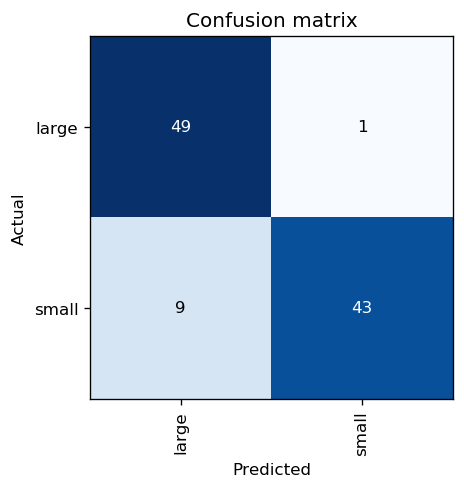

In [14]:
# Plot the confusion matrix to see where model is getting confused most (predicting wrong class)
# NOTE: we don't have even number of examples in our validation set, so 
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

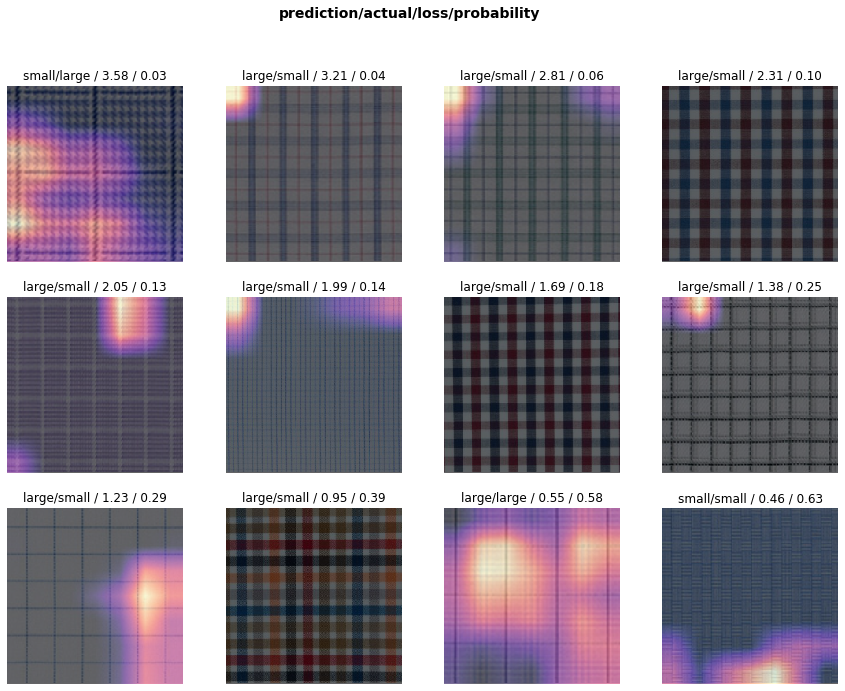

In [15]:
# See where model got it really wrong. The displayed images will show heatmap
# indiciating what area of the image is getting mixed up with wrongly predicted class
interp.plot_top_losses(12, figsize=(15,11))

In [17]:
# Print which class is getting mixed up with which other class the most
interp.most_confused(min_val=2)

[('small', 'large', 9)]

In [18]:
learner.export(trained_model_file)